In [1]:
%%capture
!pip install netcdf4
!pip install geopandas

In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np
import geopandas as gpd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
ruta_Sudamerica = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/TPM_II/datos/shps/South_America.shp"
Sudamerica = gpd.read_file(ruta_Sudamerica)

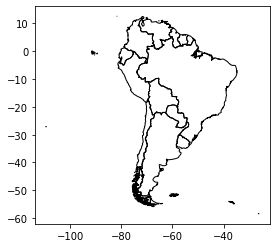

In [5]:
lugar = Sudamerica.plot(facecolor="none",edgecolor="black")

In [10]:
ruta_DEM = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/TPM_II/datos/Spatial_co_variables/DEM.nc"
curvas = xr.open_dataset(ruta_DEM)
curvas

<xarray.Dataset>
Dimensions:    (longitude: 1422, latitude: 1982)
Coordinates:
  * longitude  (longitude) float64 -81.4 -81.39 -81.38 ... -67.21 -67.2 -67.19
  * latitude   (latitude) float64 1.22 1.21 1.2 1.19 ... -18.57 -18.58 -18.59
Data variables:
    crs        int32 ...
    DEM        (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.3-13)
    date:         2021-06-17 23:11:50

In [24]:
curvas.rename({'DEM':'Altitude'})

<xarray.Dataset>
Dimensions:    (longitude: 1422, latitude: 1982)
Coordinates:
  * longitude  (longitude) float64 -81.4 -81.39 -81.38 ... -67.21 -67.2 -67.19
  * latitude   (latitude) float64 1.22 1.21 1.2 1.19 ... -18.57 -18.58 -18.59
Data variables:
    crs        int32 ...
    Altitude   (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.3-13)
    date:         2021-06-17 23:11:50

In [25]:
curvas = curvas.rename({'DEM':'Altitude'})

(-18.5, -12.0)

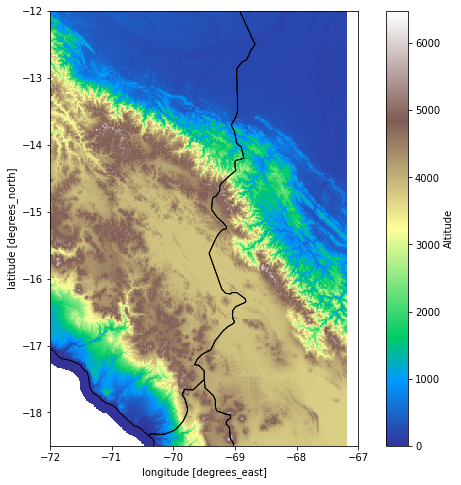

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
curvas.Altitude.plot(ax=ax,cmap="terrain")
lugar = Sudamerica.plot(ax=ax,facecolor="none",edgecolor="black")
minx, miny, maxx, maxy = -72, -18.5, -67, -12
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)